# IMPORTS

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import choice, rand 
from time import time

# EXERCISE 1

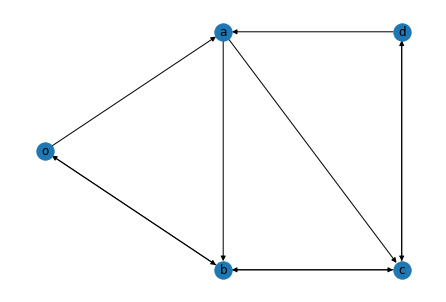

In [2]:
Lambda = [
    [0, 2/5, 1/5, 0, 0],
    [0, 0, 3/4, 1/4, 0],
    [1/2, 0, 0, 1/2, 0],
    [0, 0, 1/3, 0, 2/3],
    [0, 1/3, 0, 1/3, 0]
]

G = nx.DiGraph()
G.add_edges_from([('o','a'), ('o','b'), ('a','b'), ('a','c'), ('b','c'), ('c','d'), ('c', 'b'), ('d', 'c'), ('d','a'), ('b','o')])
pos = {'o':(40,20), 'a':(60,35), 'b':(60,5), 'c':(80,5), 'd':(80,35)} 
nx.draw(G, pos, with_labels=True)
#save graph object to file
plt.savefig("Graph1.png", format="PNG")

In [3]:
#CREATE THE ROW STOCHASTIC MATRIX

#the correspondence between nodes and position without 'a' will be ('o':0), ('a':1) ('b',2), ('c',3), ('d',4): 
w = np.sum(Lambda,axis=1)
num_states = w.size
w_i = w[1]

w_star = np.max(w)
# compute the off-diagonal part of Q
Q = Lambda/w_star 
# add the diagonal part
Q = Q + np.diag(np.ones(len(w))-np.sum(Q,axis=1))

Q


array([[0.4       , 0.4       , 0.2       , 0.        , 0.        ],
       [0.        , 0.        , 0.75      , 0.25      , 0.        ],
       [0.5       , 0.        , 0.        , 0.5       , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.66666667],
       [0.        , 0.33333333, 0.        , 0.33333333, 0.33333333]])

In [4]:
#CREATE THE NORMALYZED WEIGHT MATRIX P
#we compute P, the normalized weight matrix:
A = np.array(Lambda)
w = np.sum(A, axis=1)
D = np.diag(w)
P = np.linalg.inv(D) @ A
print(P)

[[0.         0.66666667 0.33333333 0.         0.        ]
 [0.         0.         0.75       0.25       0.        ]
 [0.5        0.         0.         0.5        0.        ]
 [0.         0.         0.33333333 0.         0.66666667]
 [0.         0.5        0.         0.5        0.        ]]


## PART A

find the average time it takes a particle that starts in node 'a' to leave the node and then return to it

In [5]:
n_iter = 100_000
n_states = 5
n_steps = 1000


list_ret_times = []

for j in range(1, n_iter):
    elapsed_time = 0
    #the process starts from node 'a' (1)
    dep_node = 1
    for i in range(1, n_steps):
        #we upgrade t_next after the fist iteration of the loop
        t_next = -np.log(np.random.rand())/w[dep_node] 
        elapsed_time += t_next
        dest_node = np.random.choice(n_states, p=P[dep_node, :])
        if dest_node == 1:
            break
        n_steps += 1
        dep_node = dest_node
        
    list_ret_times.append(elapsed_time)
    

print(sum(list_ret_times)/len(list_ret_times))

6.740287538609132


## PART B


How does the result in a) compare to the theoretical return-time Ea [Ta+ ]? (Include a descrip-
tion of how this is computed.)

The theoretical return time for continuous time is computed as:
$$
\mathbb{E}_i[T_i^+] = 1/ ({w}_i * \bar{\pi}_i)
$$

In [6]:
#the correspondence between nodes and position without 'a' will be ('o':0), ('a':1) ('b',2), ('c',3), ('d',4): 
w = np.sum(Lambda,axis=1)
w_i = w[1]

w_star = np.max(w)
# compute the off-diagonal part of Q
Q = Lambda/w_star 
# add the diagonal part
Q = Q + np.diag(np.ones(len(w))-np.sum(Q,axis=1))

# compute dominant eigenvector
values,vectors = np.linalg.eig(Q.T)
index = np.argmax(values.real)
pi_bar = vectors[:,index].real
pi_bar = pi_bar/np.sum(pi_bar)
print("pi_bar=", pi_bar)

nstates = len(pi_bar)

pi_bar= [0.18518519 0.14814815 0.22222222 0.22222222 0.22222222]


In [7]:
pi_bar_i = pi_bar[1]
Expected_return_time = 1/ (pi_bar_i*w_i)
Expected_return_time

6.75

## PART C

What is, according to the simulations, the average time it takes to move from node o to node
d?

In [8]:
n_iter = 100_000
n_states = 5
n_steps = 1000


list_ret_times = []

for j in range(1, n_iter):
    elapsed_time = 0
    #the process starts from node 'o' (0)
    dep_node = 0
    for i in range(1, n_steps):
        #we upgrade t_next after the fist iteration of the loop
        t_next = -np.log(np.random.rand())/w[dep_node] 
        elapsed_time += t_next
        dest_node = np.random.choice(n_states, p=P[dep_node, :])
        #the loop ends when reaches d (4)
        if dest_node == 4:
            break
        n_steps += 1
        dep_node = dest_node
        
    list_ret_times.append(elapsed_time)
    

print(sum(list_ret_times)/len(list_ret_times))

8.82645489015015


## PART D

How does the result in c) compare to the theoretical hitting-time Eo [Td ]? (Describe also how
this is computed.)

The expected hitting times  $\hat{x}= (\mathbb{E}_i[T_S])_{i \in R}$ for the set $S$ and for all nodes $i \in R = \mathcal V \setminus S$ can be computed by solving the system of equations

$$
\hat{x} = \mathbf{1} + \hat{P}\hat{x},
$$ 

where $\hat{P}$ is obtained from $P$ (the normalized weight matrix of the graph) by removing the rows and columns corresponding to the nodes in the set $S$.

More explicitly, the expected hitting times can be expressed as

$$
\hat{x} = (I - \hat{P})^{-1} \mathbf{1}
$$

In our case the set $S$ is composed by only 'd'


In [9]:
#we compute P, the normalized weight matrix:
A = np.array(Lambda)
w = np.sum(A, axis=1)
D = np.diag(w)
P = np.linalg.inv(D) @ A
print(P)

[[0.         0.66666667 0.33333333 0.         0.        ]
 [0.         0.         0.75       0.25       0.        ]
 [0.5        0.         0.         0.5        0.        ]
 [0.         0.         0.33333333 0.         0.66666667]
 [0.         0.5        0.         0.5        0.        ]]


In [10]:
#we threat the nodes as number: ('o':0), ('a',1), ('b',2), ('c',3), ('d',4))
n_nodes = G.number_of_nodes()
#we define the set S and the remaining nodes R
S = [1]
R = [node for node in range(n_nodes) if node not in S ]

hatP = P[np.ix_(R,R)]
hatx = np.linalg.solve((np.identity(n_nodes-1)-hatP),np.ones(n_nodes-1))

#the correspondence between nodes and position without 'a' will be ('o':0), ('b',1), ('c',2), ('d',3)): 
print(hatx)

[2.57142857 4.71428571 4.85714286 3.42857143]


In [11]:
x = 1/w[0] + 1/w[1] + 1/w[2] + 1/w[3]
y = P[4][0]*hatx[0] + P[4][1]*hatx[1] + P[4][2]*hatx[2] + P[4][3]*hatx[3]
y+x


8.738095238095237

L'expected hitting time  $\hat{x}= (\mathbb{E}_o[T_S])$ where $S$={'d'} is 8.87 seconds

## PART E

Interpret the matrix Λ as the weight matrix of a graph G = (V, E, Λ), and simulate the French-
DeGroot dynamics on G with an arbitrary initial condition x(0). Does the dynamics converge
to a consensus state for every initial condition x(0)? Motivate your answer

We know from the theory that given a graph G=(V,E,Λ), if satisfies the following conditions:
- its condensation graph has 1 sink;
- the sink component of the graph is aperiodic;

Then,

$$
\lim_{t \to +\infty} x(t) = \alpha \mathbf{1},
$$

This means that whatever initial condition x(0), the dynamic converges to  a consensus

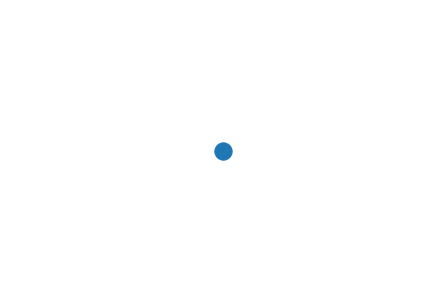

In [12]:
#we check that there is only one sink in the condensation graph

Condensation_graph = nx.algorithms.components.condensation(G)
nx.draw(Condensation_graph)

To know that the sink of the graph is aperiodic, we need to search if there are one even and one odd path that starts and ends in the sink: in this case for example there is at least one odd path (da-ac-cd) and at least one even path (dc-cb-bc-cd), then the sink component is aperiodic. Then we can state that the dynamic converge to a consensus state for every initial condition x(0)

## PART F

Assume that the initial state of the dynamics for each node i ∈ V is given by xi (0) = ξi , where
{ξi }i∈V are i.i.d random variables with variance ${σ}^ 2$ . Compute the variance of the consensus
value, and compare your results with numerical simulations.

In [13]:
n_iterations = 10000
list_result = []
size = 5 

#the opinion generation is performed with a random normal to obtain the i.i.d random variables
def generate_opinions(size):
    x = np.random.normal(size=size)
    return x

y = generate_opinions(size)

#we extract the mean and the standard deviation used
my_mean = np.mean(y)
my_std = np.std(y)


for i in range(1, n_iterations):

    x = generate_opinions(size)
    
    for i in range(300):
        x = P @ x
    
    list_result.append(x[0])

print(np.var(list_result))

0.21821208768685518


In [14]:
#we compare the simulation result with the theoretical one:
Var = my_std *(pi_bar[0]**2 + pi_bar[1]**2 + pi_bar[2]**2 + pi_bar[3]**2 + pi_bar[4]**2)
Var

0.16171540911066132

## PART G

Remove the edges (d, a) and (d, c). Describe and motivate the asymptotic behaviour of the
dynamics. If the dynamics converges to a consensus state, how is the consensus value related
to the initial condition x(0)? Assume that the initial state of the dynamics for each node
i ∈ V is given by xi (0) = ξi , where {ξi }i∈V are i.i.d random variables with variance σ 2 .
Compute the variance of the consensus value. Motivate your answer.

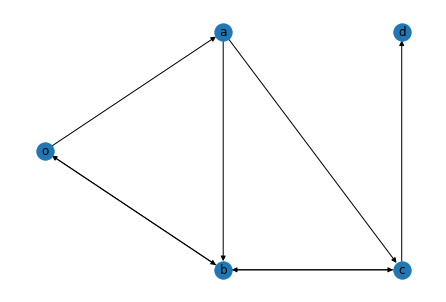

In [15]:
G_2 = nx.DiGraph()
G_2.add_edges_from([('o','a'), ('o','b'), ('a','b'), ('a','c'), ('b','c'), ('c','d'), ('c', 'b'), ('b','o')])
pos = {'o':(40,20), 'a':(60,35), 'b':(60,5), 'c':(80,5), 'd':(80,35)} 
nx.draw(G_2, pos, with_labels=True)
plt.savefig("GraphG.png", format="PNG")

There is only one path that starts and ends in the sink 'd', and this is the self loop. This means that the sink component is aperiodic

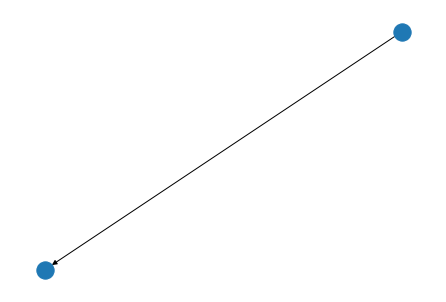

In [16]:
#we can see that the condensation graph has only one sink
Condensation_graph = nx.algorithms.components.condensation(G_2)
nx.draw(Condensation_graph)

Because the condensation graph has only one sink, this means that both the conditions described in part E are satisfied and then whatever are the initial conditions x(0), the system converges to a consensus

In [17]:
#we need to compute P for the new Graph G_2

Lambda_2 = [
    [0, 2/5, 1/5, 0, 0],
    [0, 0, 3/4, 1/4, 0],
    [1/2, 0, 0, 1/2, 0],
    [0, 0, 1/3, 0, 0],
    [0, 1/3, 0, 1/3, 0]
]

A = np.array(Lambda_2)
w = np.sum(A, axis=1)
D = np.diag(w)
P = np.linalg.inv(D) @ A

In [19]:
n_iterations = 10000
list_result = []
size = 5 

def generate_opinions(size):
    x = np.random.normal(size=size)
    return x

y = generate_opinions(size)
my_mean = np.mean(y)
my_std = np.std(y)

for i in range(1, n_iterations):

    x = generate_opinions(size)
    
    for i in range(300):
        x = P @ x
    
    list_result.append(x[0])

print(np.var(list_result))

0.29987595550067986


## PART H

Consider the graph (V, E, Λ), and remove the edges (c, b) and (d, a). Analyse the French-
DeGroot dynamics on the new graph. In particular, describe and motivate the asymptotic
behaviour of the dynamics in terms of the initial condition x(0).

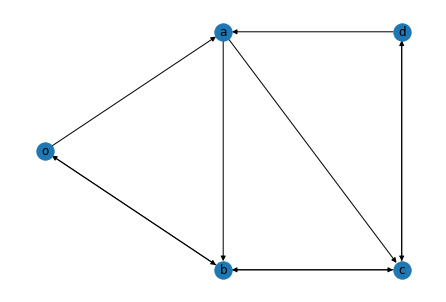

In [20]:
G_3 = nx.DiGraph()
G.add_edges_from([('o','a'), ('o','b'), ('a','b'), ('a','c'), ('b','c'), ('c','d'), ('d', 'c'), ('b','o')])
pos = {'o':(40,20), 'a':(60,35), 'b':(60,5), 'c':(80,5), 'd':(80,35)} 
nx.draw(G, pos, with_labels=True)
plt.savefig("GraphH.png", format="PNG")

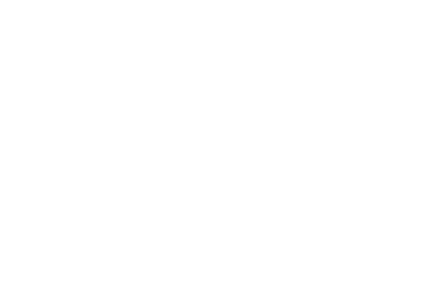

In [21]:
Condensation_graph = nx.algorithms.components.condensation(G_3)
nx.draw(Condensation_graph)

In [35]:
#we need to compute P for the new Graph G_3
Lambda_3 = [  [0, 2/5, 1/5, 0, 0],
              [0, 0, 3/4, 1/4, 0],
              [1/2, 0, 0, 1/2, 0],
              [0, 0, 0, 0, 2/3],
              [0, 0, 0, 1/3, 0]
]

A = np.array(Lambda_2)
w = np.sum(A, axis=1)
D = np.diag(w)
P = np.linalg.inv(D) @ A

In [36]:
list_result = []
size = 5 

def generate_opinions(size):
    x = np.random.normal(size=size)
    return x

x = generate_opinions(size)
print(x)

for i in range(1, 300):
    x = P @ x

print(x)



[ 0.01041106  0.20985147 -1.31117219  0.13101308 -0.48342455]
[-0.47983112 -0.47983112 -0.47983112 -0.47983112 -0.47983112]


# EXERCISE 2

## PARTICLE PERSPECTIVE

In [22]:
#is like in exercise one, the average time for a particle to return to node a 

n_iter = 100
n_states = 5
n_steps = 1000


list_ret_times = []

for j in range(1, n_iter):
    elapsed_time = 0
    #the process starts from node 'a' (1)
    dep_node = 1
    for i in range(1, n_steps):
        #we upgrade t_next after the fist iteration of the loop
        t_next = -np.log(np.random.rand())/w[dep_node] 
        elapsed_time += t_next
        dest_node = np.random.choice(n_states, p=P[dep_node, :])
        if dest_node == 1:
            break
        n_steps += 1
        dep_node = dest_node
        
    list_ret_times.append(elapsed_time)
    

print(sum(list_ret_times)/len(list_ret_times))


13.199859518777341


## NODE PERSPECTIVE

In [23]:
n_nodes = G.number_of_nodes()
particle_distr = np.zeros(n_nodes)
particle_distr[0] = 100
elapsed_time = 0
global_rate = 100
node_depart = 0
node_arrival = 0
p_vector = np.zeros(n_nodes)
for num, i in enumerate(particle_distr):
    p_vector[num] = i/100
counter = 0
t_next = 0

#create lists to plot the results:
transition_times = []
evolution_o = []
evolution_a = []
evolution_b = []
evolution_c = []
evolution_d = []

number_of_trials = 1000
list_results = []

for i in range(1,number_of_trials+1):
    while elapsed_time<60:
        #choose the node from which the particle departs:
        node_depart = np.random.choice(n_nodes, p = p_vector)
        t_next = -np.log(np.random.rand())/global_rate
        elapsed_time += t_next
        transition_times.append(elapsed_time)
        #choose the node that the particle leaves for:
        node_arrival = np.random.choice(n_nodes, p=Q[node_depart, :])
        #update part:
        particle_distr[node_depart] -= 1
        particle_distr[node_arrival] += 1
        p_vector[node_depart] = particle_distr[node_depart]/100
        p_vector[node_arrival] = particle_distr[node_arrival]/100
        #update the lists for the plot:
        for num, el in enumerate(particle_distr):
            if num == 0:
                evolution_o.append(el)
            elif num==1:
                evolution_a.append(el)
            elif num==2:
                evolution_b.append(el)
            elif num==3:
                evolution_c.append(el)
            elif num==4:
                evolution_d.append(el)
    list_results.append(list(particle_distr))


In [24]:
output_list = [ [], [], [], [], []]
for i in list_results:
    for num, j in enumerate(i):
        output_list[num].append(j)

avg_number_particles = []
for num, i in enumerate(output_list):
    print(f'the average number of particles at the end of the simulation for node {num} is {sum(i)/len(i)}')
    avg_number_particles.append(sum(i)/len(i))
    


the average number of particles at the end of the simulation for node 0 is 13.0
the average number of particles at the end of the simulation for node 1 is 12.0
the average number of particles at the end of the simulation for node 2 is 21.0
the average number of particles at the end of the simulation for node 3 is 25.0
the average number of particles at the end of the simulation for node 4 is 29.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


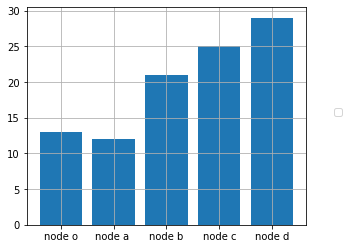

In [25]:
#plot an histogram with the average number of particles
x = [0, 1, 2, 3, 4]
labels = ['node o', 'node a ', 'node b', 'node c', 'node d']
fig, ax = plt.subplots(figsize=(5,4))
ax.bar(x, avg_number_particles, tick_label = labels)
ax.grid()
ax.legend(loc=(1.1, 0.5)) 
plt.savefig("hist1.png", format="PNG")
plt.show()

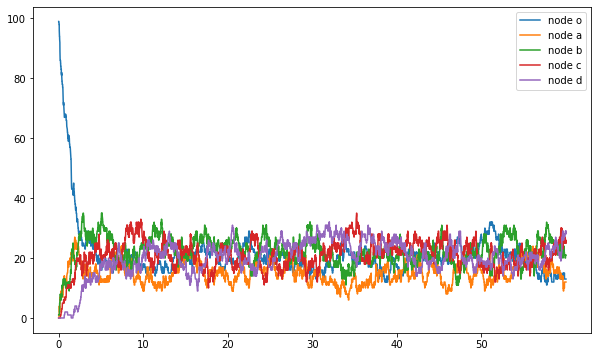

In [26]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(transition_times, evolution_o, label = "node o")
ax.plot(transition_times, evolution_a, label = "node a")
ax.plot(transition_times, evolution_b, label = "node b")
ax.plot(transition_times, evolution_c, label = "node c")
ax.plot(transition_times, evolution_d, label = "node d")
plt.yticks(np.arange(0, 101, 20, dtype=int))
plt.xticks(np.arange(0, 60, 10, dtype=int))
ax.legend()
plt.show()

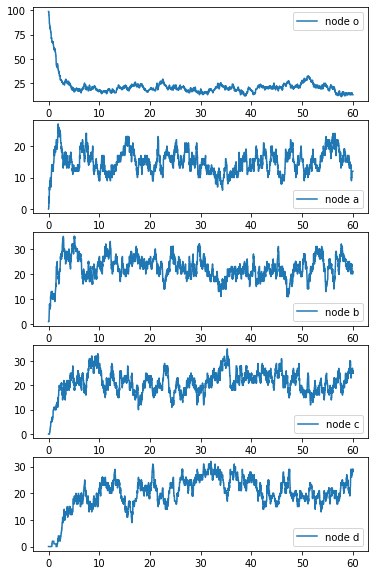

In [27]:
#proviamo a fare un subplot per nodo così è più leggibile
fig, ax = plt.subplots(5, 1, figsize=(6,10))
ax[0].plot(transition_times, evolution_o, label = "node o")
ax[0].legend()
ax[1].plot(transition_times, evolution_a, label = "node a")
ax[1].legend()
ax[2].plot(transition_times, evolution_b, label = "node b")
ax[2].legend()
ax[3].plot(transition_times, evolution_c, label = "node c")
ax[3].legend()
ax[4].plot(transition_times, evolution_d, label = "node d")
ax[4].legend()
#plt.yticks(np.arange(0, 101, 20, dtype=int))
#plt.xticks(np.arange(0, 60, 10, dtype=int))
plt.savefig("distrib1.png", format="PNG")

Compare the simulation result in the first point above with the stationary distribution of
the continuous-time random walk followed by the single particles.

In [28]:
stat_distr = pi_bar * 100
stat_distr

array([18.51851852, 14.81481481, 22.22222222, 22.22222222, 22.22222222])

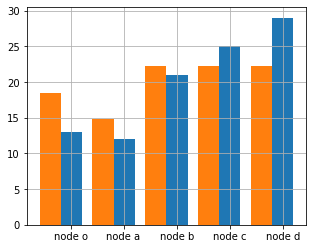

In [29]:
x = np.array([0, 1, 2, 3, 4])
labels = ['node o', 'node a ', 'node b', 'node c', 'node d']
width = 0.4
fig, ax = plt.subplots(figsize=(5,4))
ax.bar(x+width/2, avg_number_particles, tick_label = labels, width=width)  #blue ones
ax.bar(x-width/2, stat_distr, width=width) #orange ones
ax.grid()
plt.savefig("hist2.png", format="PNG")
plt.show()

# EXERCISE 3

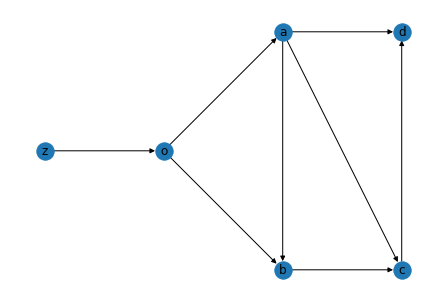

In [30]:
Lambda_open = [
                [0, 3/4, 3/8, 0, 0],
                [0, 0, 1/4, 1/4, 2/4],
                [0, 0, 0, 1, 0],
                [0, 0, 0, 0, 1],
                [0, 0, 0, 0, 0]]

G_3 = nx.DiGraph()
G_3.add_edges_from([('z','o'), ('o','a'), ('o','b'), ('a','b'), ('b','c'), ('a','c'), ('a','d'), ('c','d')])
pos = {'z':(20,20), 'o':(40,20), 'a':(60,35), 'b':(60,5), 'c':(80,5), 'd':(80,35)} 
nx.draw(G_3, pos, with_labels=True)
plt.savefig("Art_graph.png", format="PNG")


## PROPORTIONAL RATE

In [31]:
Lambda_z = [    [0, 1, 0, 0, 0, 0],
                [0, 0, 3/4, 3/8, 0, 0],
                [0, 0, 0, 1/4, 1/4, 2/4],
                [0, 0, 0, 0, 1, 0],
                [0, 0, 0, 0, 0, 1],
                [0, 0, 0, 0, 0, 0]]

#create normalyzed weight matrix
A = np.array(Lambda_z)
w = np.sum(A, axis=1)
D = np.diag(1/w)
P = D @ A
p = np.zeros(5)
print(p)
P_new = []
for num, i in enumerate(P):
    if num == 5:
        l = [0 for i in range(6)]
        l[5] = 1
        P_new.append(l)
    else:
        P_new.append(i)
P = np.array(P_new)


n_nodes = len(G_3.nodes())
particle_distr = np.zeros(n_nodes)
#artificial node 'z' can send in the network an unlimited amount of particles, we set to 1 and don't decrease
particle_distr[0] = 1
elapsed_time = 0
lambda_coeff = 1

#create lists to plot the results:
transition_times = []
evolution_o = []
evolution_a = []
evolution_b = []
evolution_c = []
evolution_d = []

while elapsed_time<60:
    #initialize list_tnext
    list_tnext = [float('inf') for node in range(n_nodes)]
    #we install one poisson clock for each node that contains some particles
    for node in range(n_nodes):
        if node == 0 and particle_distr[node]>0:
            list_tnext[0] = -np.log(np.random.rand())/lambda_coeff
        elif node == 5 and particle_distr[node]>0:
            list_tnext[5] = -np.log(np.random.rand())/(particle_distr[node]*2)
        else:
            if particle_distr[node]>0:
                list_tnext[node] = -np.log(np.random.rand())/(particle_distr[node]*w[node])

    #the node that ticks first moves 
    pos = np.argmin(list_tnext)
    elapsed_time += list_tnext[pos]
    transition_times.append(elapsed_time)
    #update the particles (if the node that ticks is 'd' we only decrease and not add anywere)
    if pos == 5:
        #the node goes out of the system, there is no node_arrival
        particle_distr[pos] -= 1
    elif pos == 0:
        #node_arrival will certainly be 1 (node 'o') and we don't decrease the capacity of 'z' that is unlimited
        particle_distr[1] += 1
    else:
        node_arrival = np.random.choice(n_nodes, p=P[pos, :])
        particle_distr[pos] -= 1
        particle_distr[node_arrival] += 1  

    for num, el in enumerate(particle_distr):
        #we don't plot node 'z' because is not part of the original graph
        if num == 1:
            evolution_o.append(el)
        elif num==2:
            evolution_a.append(el)
        elif num==3:
            evolution_b.append(el)
        elif num==4:
            evolution_c.append(el)
        elif num==5:
            evolution_d.append(el)

[0. 0. 0. 0. 0.]


/tmp/ipykernel_21055/30249253.py:11: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(1/w)
/tmp/ipykernel_21055/30249253.py:12: RuntimeWarning: invalid value encountered in matmul
  P = D @ A


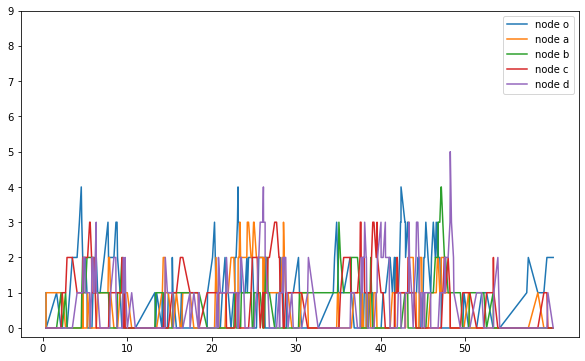

In [32]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(transition_times, evolution_o, label = "node o")
ax.plot(transition_times, evolution_a, label = "node a")
ax.plot(transition_times, evolution_b, label = "node b")
ax.plot(transition_times, evolution_c, label = "node c")
ax.plot(transition_times, evolution_d, label = "node d")
plt.yticks(np.arange(0, 10, 1, dtype=int))
plt.xticks(np.arange(0, 60, 10, dtype=int))
ax.legend()
plt.savefig("point3.png", format="PNG")
plt.show()

What is the largest input rate that the system can handle without blowing up?

Because the rate is proportional to the number of particles in the node, even if we increase a lot the lambda of node 'z' in order to send more particles in the system, the other nodes became faster and faster in sending and receiving those, so that the system will never blow up.

## FIXED RATE

Simulate the system for 60 time units and plot the evolution of number of particles in
each node over time.

In [33]:
'''PROVA CON Z CHE ENTRA ANCHE NELLA MATRICE'''

Lambda_z = [    [0, 1, 0, 0, 0, 0],
                [0, 0, 3/4, 3/8, 0, 0],
                [0, 0, 0, 1/4, 1/4, 2/4],
                [0, 0, 0, 0, 1, 0],
                [0, 0, 0, 0, 0, 1],
                [0, 0, 0, 0, 0, 0]]

#create normalyzed weight matrix
A = np.array(Lambda_z)
w = np.sum(A, axis=1)
D = np.diag(1/w)
P = D @ A
p = np.zeros(5)
print(p)
P_new = []
for num, i in enumerate(P):
    if num == 5:
        l = [0 for i in range(6)]
        l[5] = 1
        P_new.append(l)
    else:
        P_new.append(i)
P = np.array(P_new)


n_nodes = len(G_3.nodes())
particle_distr = np.zeros(n_nodes)
#artificial node 'z' can send in the network an unlimited amount of particles, we set to 1 and don't decrease
particle_distr[0] = 1
elapsed_time = 0
lambda_coeff = 1

#create lists to plot the results:
transition_times = []
evolution_o = []
evolution_a = []
evolution_b = []
evolution_c = []
evolution_d = []

while elapsed_time<60:
    #initialize list_tnext
    list_tnext = [float('inf') for node in range(n_nodes)]
    #we install one poisson clock for each node that contains some particles
    for node in range(n_nodes):
        if node == 0 and particle_distr[node]>0:
            list_tnext[0] = -np.log(np.random.rand())/lambda_coeff
        elif node == 5 and particle_distr[node]>0:
            list_tnext[5] = -np.log(np.random.rand())/2
        else:
            if particle_distr[node]>0:
                list_tnext[node] = -np.log(np.random.rand())/w[node]

    #the node that ticks first moves 
    pos = np.argmin(list_tnext)
    elapsed_time += list_tnext[pos]
    transition_times.append(elapsed_time)
    #update the particles (if the node that ticks is 'd' we only decrease and not add anywere)
    if pos == 5:
        #the node goes out of the system, there is no node_arrival
        particle_distr[pos] -= 1
    elif pos == 0:
        #node_arrival will certainly be 1 (node 'o') and we don't decrease the capacity of 'z' that is unlimited
        particle_distr[1] += 1
    else:
        node_arrival = np.random.choice(n_nodes, p=P[pos, :])
        particle_distr[pos] -= 1
        particle_distr[node_arrival] += 1  

    for num, el in enumerate(particle_distr):
        #we don't plot node 'z' because is not part of the original graph
        if num == 1:
            evolution_o.append(el)
        elif num==2:
            evolution_a.append(el)
        elif num==3:
            evolution_b.append(el)
        elif num==4:
            evolution_c.append(el)
        elif num==5:
            evolution_d.append(el)

/tmp/ipykernel_21055/2521145563.py:13: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(1/w)
/tmp/ipykernel_21055/2521145563.py:14: RuntimeWarning: invalid value encountered in matmul
  P = D @ A


[0. 0. 0. 0. 0.]


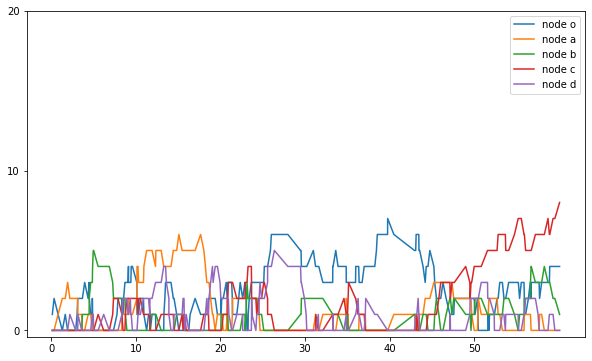

In [34]:
#graph with lambda equals to 1

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(transition_times, evolution_o, label = "node o")
ax.plot(transition_times, evolution_a, label = "node a")
ax.plot(transition_times, evolution_b, label = "node b")
ax.plot(transition_times, evolution_c, label = "node c")
ax.plot(transition_times, evolution_d, label = "node d")
plt.yticks(np.arange(0, 30, 10, dtype=int))
plt.xticks(np.arange(0, 60, 10, dtype=int))
ax.legend()
plt.savefig("point3_2_unblown.png", format="PNG")
plt.show()